

```
# This is formatted as code
```


Author: Karan Kokabisaghi
Strategy Analyst| Data Scientist|Python Developer

Date: 14 November 2022

Version: 1.0

# Mount google drive or read data from your directory on the computer

In [10]:
# connect to the working directory
from google.colab import drive
drive.mount('/content/drive') 
import os
os.chdir(r'/content/drive/My Drive') # Define your directory in your google drive
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory = /content/drive/My Drive/Financial_Crime_Py_Codes
/content/drive/My Drive/Financial_Crime_Py_Codes


In [11]:
#!pip install xlrd
import xlrd # to import/read excel file
import networkx as nx


# Build the network
- Read Data from excel file

In [12]:
# Open Workbook :
#--------------------------------------
loc = (r"/content/drive/My Drive/example_excel_datascience.xlsx")

wb = xlrd.open_workbook(loc)
sheet_nodes = wb.sheet_by_name("Node_info") # read sheet by name
print(sheet_nodes)

edge from  1 to  2 action: strategy_1_yes , prob 1.0 , cost -10.0
edge from  1 to  6 action: strategy_1_no , prob 1.0 , cost 0.0
edge from  2 to  3 action: meet_criteria_yes , prob 0.0 , cost 0.0
edge from  2 to  6 action: meet_criteria_no , prob 0.0 , cost 0.0
edge from  3 to  4 action: strategy_2_yes , prob 1.0 , cost -10.0
edge from  3 to  6 action: strategy_2_no , prob 1.0 , cost 0.0
edge from  4 to  5 action: meet_criteria_yes , prob 0.0 , cost 0.0
edge from  4 to  6 action: meet_criteria_no , prob 0.0 , cost 0.0
edge from  5 to  6 action: Project_done , prob 1.0 , cost 0.0


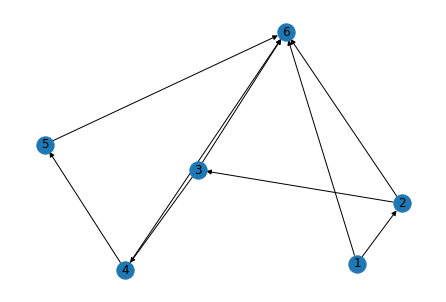

In [13]:
G = nx.DiGraph()
checklist_col = {}
for row_id in range(1,sheet_nodes.nrows): 
  #row = 0 is the titles 
  #node_id in Excel first column
  #1. get the node_id for this row and add it to the network
  node_id = int(sheet_nodes.cell_value(row_id,0))
  G.add_node(node_id)
  nr_children =  int(sheet_nodes.cell_value(row_id,2))
  #
  # To matrix check, add a column that contains matrix names to the network node 
  checklist_col.update({node_id: dict(zip(['checklist_name'],[sheet_nodes.cell_value(row_id, 4)]))}) # node_type in Excel second column  
  nx.set_node_attributes(G, checklist_col)
  # 2. CYCLE OVER ALL THE Children
  children_of_this_node = [] #a list to collect each loop 
  col_offset = 5 
  nr_features_per_edge = 4 
  for k in range(1,nr_children+1):
    '''
    read the k-th child's node_id at 
     the following location in the excel sheet_nodes
    '''
    child_node_id_col0 = col_offset-1+(k-1)*nr_features_per_edge+1
    child_node_id  = int(sheet_nodes.cell(row_id, child_node_id_col0).value)
    children_of_this_node.append(child_node_id)
    
    # 3. Find the corresponding attributes : column order : child_id, action, prob, cost
    attr_action_col0 = child_node_id_col0 + 1
    edge_action = sheet_nodes.cell(row_id, attr_action_col0).value
    attr_prob_col0 = child_node_id_col0 + 2
    edge_prob = sheet_nodes.cell(row_id, attr_prob_col0).value
    attr_cost_col0 = child_node_id_col0 + 3 
    edge_cost = sheet_nodes.cell(row_id, attr_cost_col0).value  
    print('edge from ', node_id, 'to ', child_node_id, 
   'action:', edge_action, 
   ', prob', edge_prob, ', cost', edge_cost)
    G.add_edge(node_id, child_node_id, action = edge_action, prob = edge_prob, cost = edge_cost ) 
nx.draw(G,with_labels=True)

# Read Checklists:
Here we use an example that 50% of the checklists are filled.

In [14]:
checklist_sheet = { 'checklist_1': 0.5, 'checklist_2': 0.5}

# Creare the Networkx by adding nodes and edges.

In [15]:
for node in G.nodes:
  checklist_col = G.nodes[node]["checklist_name"]
  for sheet_tab, sheet_content in checklist_sheet.items():
    if sheet_tab == checklist_col:
      update_prob = sheet_content
     # print('I am node:', node, ', my checklist is:', sheet_tab, ', with probability :', update_prob)
      for i,j in G[node].items():
   
        for jj in j.values():
          if isinstance(jj,str):
            if 'yes' in jj: 
              print('I am node :', node, ', my child is :', i, ', from the edge with action:', jj)
              print('')
              for chance_id, chance_attr in G[i].items():
                print( 'I am edge from node:', i,' to the node : ' , chance_id, '& my attributes are', chance_attr)
                
                if chance_attr['action'] == 'meet_criteria_yes':
                  chance_attr['prob'] = update_prob
                  print('the probability should be updated to:', chance_attr['prob'])
                else:
                  chance_attr['prob'] = 1- update_prob
                  print('the probability should be updated to:', chance_attr['prob'])
                print('')

I am node : 1 , my child is : 2 , from the edge with action: strategy_1_yes

I am edge from node: 2  to the node :  3 & my attributes are {'action': 'meet_criteria_yes', 'prob': 0.0, 'cost': 0.0}
the probability should be updated to: 0.5

I am edge from node: 2  to the node :  6 & my attributes are {'action': 'meet_criteria_no', 'prob': 0.0, 'cost': 0.0}
the probability should be updated to: 0.5

I am node : 3 , my child is : 4 , from the edge with action: strategy_2_yes

I am edge from node: 4  to the node :  5 & my attributes are {'action': 'meet_criteria_yes', 'prob': 0.0, 'cost': 0.0}
the probability should be updated to: 0.5

I am edge from node: 4  to the node :  6 & my attributes are {'action': 'meet_criteria_no', 'prob': 0.0, 'cost': 0.0}
the probability should be updated to: 0.5



# Print the updated network

In [19]:
for node_from, node_to, edge_attr in G.edges.data():
  print(node_from,'to', node_to,':', edge_attr)

1 to 2 : {'action': 'strategy_1_yes', 'prob': 1.0, 'cost': -10.0}
1 to 6 : {'action': 'strategy_1_no', 'prob': 1.0, 'cost': 0.0}
2 to 3 : {'action': 'meet_criteria_yes', 'prob': 0.5, 'cost': 0.0}
2 to 6 : {'action': 'meet_criteria_no', 'prob': 0.5, 'cost': 0.0}
3 to 4 : {'action': 'strategy_2_yes', 'prob': 1.0, 'cost': -10.0}
3 to 6 : {'action': 'strategy_2_no', 'prob': 1.0, 'cost': 0.0}
4 to 5 : {'action': 'meet_criteria_yes', 'prob': 0.5, 'cost': 0.0}
4 to 6 : {'action': 'meet_criteria_no', 'prob': 0.5, 'cost': 0.0}
5 to 6 : {'action': 'Project_done', 'prob': 1.0, 'cost': 0.0}
